# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [3]:
#cities

In [4]:
original_cities = cities
#cities =["London", "Boston","Cape Town", "Sydney", "Rachel City"]

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL. PUT THIS IN FOR LOOP.
query_url = url + "appid="+ weather_api_key + "&q=" + city


In [6]:
# #Looking at json print to see categories on test city, London
# test_query_url = f"{url}appid={weather_api_key}&units={units}&q={testcity}"
# testcity = "London"
# weather_response = requests.get(test_query_url)
# weather_json = weather_response.json()
# print(json.dumps(weather_json, indent=2))

In [7]:
#Lists to hold response information:

cityname = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

#City and set counters initializing
counter = 0
setnumber = 1

#Loop through the city list and perform data requests
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    query_url = url + "appid="+ weather_api_key + "&q=" + city + "&units=" +"imperial"
    try:
        response=requests.get(query_url).json()
        cityname.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        #Including the counters within the for loop so the print statement updates
        if counter == 50:
            counter = 1
            setnumber += 1

        else:
            counter += 1

        
        #Printing each record for every city
        print(f"Processing Record {counter} of Set {setnumber} | {city}")
        
        time.sleep(1)
    except:
        print(f"City {city} not found. Skipping...")
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | albany
City illoqqortoormiut not found. Skipping...
Processing Record 3 of Set 1 | minas
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | prince rupert
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | kadnikov
Processing Record 9 of Set 1 | te anau
Processing Record 10 of Set 1 | kloulklubed
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | agadez
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | sebastian
Processing Record 15 of Set 1 | waingapu
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | kargasok
Processing Record 23 

Processing Record 31 of Set 4 | amahai
Processing Record 32 of Set 4 | merauke
Processing Record 33 of Set 4 | gat
Processing Record 34 of Set 4 | lebu
Processing Record 35 of Set 4 | los llanos de aridane
Processing Record 36 of Set 4 | yantal
Processing Record 37 of Set 4 | colesberg
Processing Record 38 of Set 4 | manta
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | pierre
City palabuhanratu not found. Skipping...
Processing Record 41 of Set 4 | esmeraldas
Processing Record 42 of Set 4 | mbekenyera
Processing Record 43 of Set 4 | manoel urbano
Processing Record 44 of Set 4 | inirida
Processing Record 45 of Set 4 | totness
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | yumen
Processing Record 48 of Set 4 | roma
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | virginia beach
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | cururupu
Processing Record 3 of Set 5 | tabory
Processing Record 4

Processing Record 17 of Set 8 | biloela
Processing Record 18 of Set 8 | anadyr
Processing Record 19 of Set 8 | denpasar
Processing Record 20 of Set 8 | batagay
Processing Record 21 of Set 8 | lokachi
Processing Record 22 of Set 8 | lasa
Processing Record 23 of Set 8 | togur
Processing Record 24 of Set 8 | minab
Processing Record 25 of Set 8 | manitowoc
Processing Record 26 of Set 8 | bac lieu
Processing Record 27 of Set 8 | orange
Processing Record 28 of Set 8 | ashtabula
Processing Record 29 of Set 8 | sorong
City cockburn harbour not found. Skipping...
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | velventos
City alotau not found. Skipping...
Processing Record 32 of Set 8 | mantua
Processing Record 33 of Set 8 | kita
Processing Record 34 of Set 8 | namatanai
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | tessalit
Processing Record 37 of Set 8 | stuttgart
Processing Record 38 of Set 8 | benemerito de las americas
City tumann

In [8]:
#Checking array length for dataframe assembly
print(len(cityname))
print(len(lat))
print(len(lng))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

539
539
539
539
539
539
539
539
539


## Convert Raw Data to DataFrame
* Save as csv

In [9]:
#Create a data frame from the following dictionary:

#Dictionary
weather_dict = {
    "City": cityname,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

#Saving as csv
weather_data.to_csv("Weather CSV")

In [10]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,25.84,94,9,16.69,RU,1603085585
1,Albany,42.60,-73.97,52.00,70,66,4.83,US,1603085587
2,Minas,-34.38,-55.24,68.00,82,1,9.17,UY,1603085588
3,Puerto Ayora,-0.74,-90.35,71.01,89,99,8.01,EC,1603085056
4,Prince Rupert,54.32,-130.32,42.80,100,90,5.82,CA,1603085457


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

(10/19/2020)


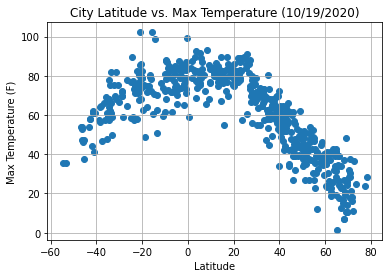

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+str(todaysdate))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

# Show plot
plt.show()

In [12]:
#Analysis of City Latitude vs Max Temperature plot:
    #This scatter plot suggests that temperature generally increases as latitude approaches zero. The value of the maximum temperature generally increases if a city's distance is closer to the equator. 
    
    
    
    

### Latitude vs. Humidity Plot

(10/19/2020)


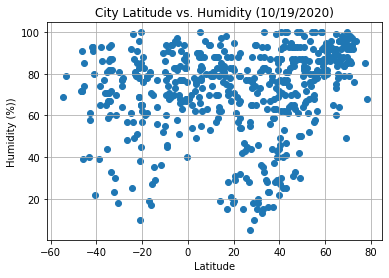

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+str(todaysdate))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

In [14]:
#Analysis of City Latitude vs Humidity plot:
    #There was not a clear, visual correlation betwen city latitude and humidity based on this scatter plot. There was a cluster of high humidity just below the equator, as well as a cluster of high humidity around the 60-70 degree latitude.
    
    
    

### Latitude vs. Cloudiness Plot

(10/19/2020)


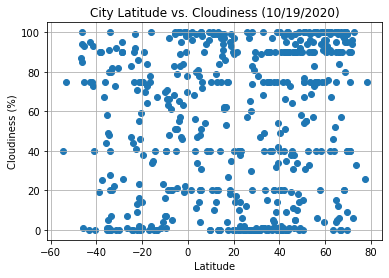

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness "+str(todaysdate))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

In [16]:
#Analysis of City Latitude vs Cloudiness plot:
    #There is no clear relationship between latitude and cloudiness. Even at a given latitude, the cloudiness data appears to be spread out.

### Latitude vs. Wind Speed Plot

(10/19/2020)


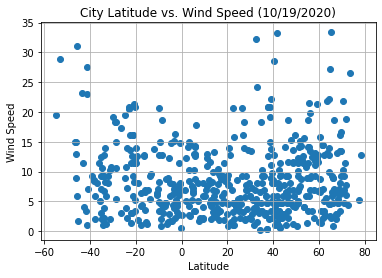

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+str(todaysdate))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()

In [18]:
#Analysis of City Latitude vs Wind Speed plot:
    #There is no clear relationship between latitude and wind speed. Wind speeds, however, are generally low. At any given latitude, the wind speed data is dispersed.
    
    
    
    
    

## Linear Regression

### Write linear regression plot function (optional)

In [19]:
#Creating dataframe for southern hemisphere
southerndf=weather_data.loc[weather_data["Lat"]<0]
southerndf


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Minas,-34.38,-55.24,68.00,82,1,9.17,UY,1603085588
3,Puerto Ayora,-0.74,-90.35,71.01,89,99,8.01,EC,1603085056
6,Kaitangata,-46.28,169.85,47.25,91,100,8.88,NZ,1603085592
8,Te Anau,-45.42,167.72,47.35,85,93,1.68,NZ,1603085594
10,Pisco,-13.70,-76.22,62.60,77,0,9.17,PE,1603085596
...,...,...,...,...,...,...,...,...,...
521,Urcos,-13.69,-71.62,50.85,64,67,5.35,PE,1603086152
522,Codrington,-38.27,141.97,56.37,74,90,8.66,AU,1603086153
523,Morón,-34.65,-58.62,78.01,71,0,1.99,AR,1603086154
529,Jardim,-21.48,-56.14,67.71,96,16,3.02,BR,1603086160


In [20]:
#Creating dataframe for northern hemisphere
northerndf=weather_data.loc[weather_data["Lat"]>=0]
northerndf



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,25.84,94,9,16.69,RU,1603085585
1,Albany,42.60,-73.97,52.00,70,66,4.83,US,1603085587
4,Prince Rupert,54.32,-130.32,42.80,100,90,5.82,CA,1603085457
5,Klyuchi,52.27,79.17,41.68,61,40,8.75,RU,1603085591
7,Kadnikov,59.50,40.34,37.38,87,96,11.59,RU,1603085593
...,...,...,...,...,...,...,...,...,...
533,Usinsk,65.99,57.53,26.40,96,84,8.86,RU,1603086165
534,Kirs,59.34,52.24,40.19,87,100,12.50,RU,1603086166
536,Tura,25.52,90.22,83.97,77,12,2.19,IN,1603085993
537,Joshīmath,30.57,79.57,70.83,20,0,7.27,IN,1603086169


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

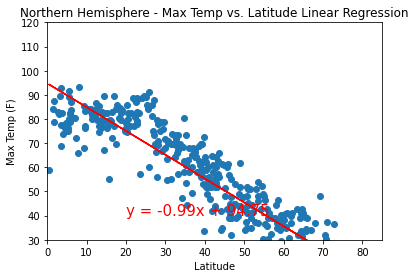

rvalue: -0.9034522829525725
rquared: 0.8162260275722152


<Figure size 432x288 with 0 Axes>

In [21]:
#Northern Hemisphere: max temp vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(30, 120)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")





In [22]:
#Analysis: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
    #The r-value of -0.9 is close to -1, suggesting a strong negative correlation between max temperature and latitude.
    #The high rsquared value of 0.81 suggests that the model fits the data well, with 81% of the data fitting the regression model.
    
    
    

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

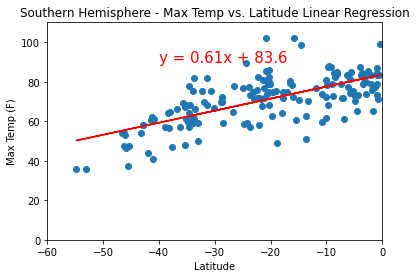

rvalue: 0.6712153045941329
rquared: 0.45052998512139464


<Figure size 432x288 with 0 Axes>

In [23]:
#Southern Hemisphere: max temp vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-40,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



In [24]:
#Analysis: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
    #The r-value of 0.67 is close to 1, suggesting a positive correlation between max temperature and latitude in the Southern Hemisphere.
    #The rsquared value of 0.45 suggests that 45% of the data fits the regression model.
    
    

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

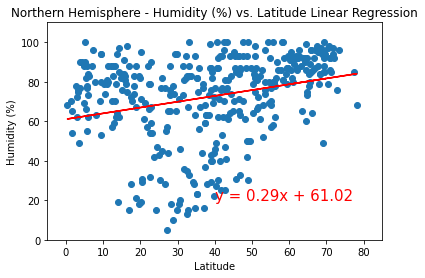

rvalue: 0.26836335627479185
rquared: 0.07201889099107087


<Figure size 432x288 with 0 Axes>

In [25]:
#Northern Hemisphere: humidity vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-5, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")




In [26]:
#Analysis: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    #The r-value of 0.28 is not very close to one, suggesting a weakly positive correlation between humidity and latitude in the Northern Hemisphere.
    #The rsquared value of implies that only 7% of the data fits the regression model.
    

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

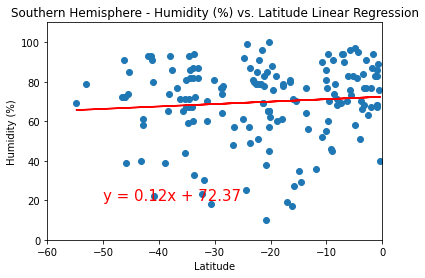

rvalue: 0.0882298042299372
rquared: 0.007784498354453045


<Figure size 432x288 with 0 Axes>

In [27]:
#Southern Hemisphere: humidity vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")



In [28]:
#Analysis: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    #The r-value of 0.08 is not very close to 1, suggesting an extremely weak positive correlation between humidity and latitude in the Southern Hemisphere.
    #The rsquared value of implies that only .6% of the data fits the regression model.
    #There is almost no correlation implied by this model.
    

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

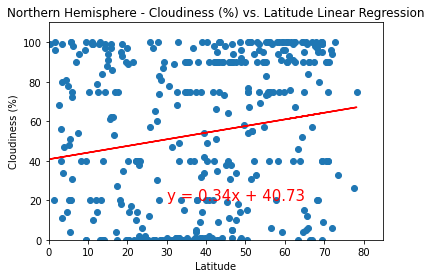

rvalue: 0.17376860401737185
rquared: 0.030195527742146178


<Figure size 432x288 with 0 Axes>

In [29]:
#Northern Hemisphere: cloudiness vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


In [30]:
#Analysis: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
    #The r-value of 0.19 is not very close to 1, suggesting a weakly positive correlation between cloudiness and latitude in the Northern Hemisphere.
    #The rsquared value of implies that only 3% of the data fits the regression model.
    

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

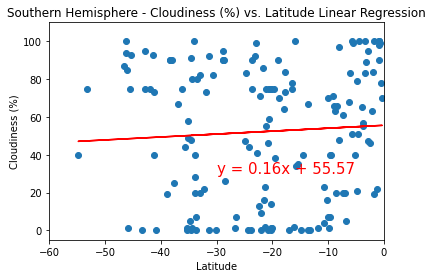

rvalue: 0.061118027151686294
rquared: 0.003735413242914263


<Figure size 432x288 with 0 Axes>

In [31]:
#Southern Hemisphere: cloudiness vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(-60,0)
plt.ylim(-5,110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [32]:
#Analysis: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
    #The r-value of 0.03 is far from 1, suggesting an extremely weak (almost no correlation) positive correlation between cloudiness and latitude in the Southern Hemisphere.
    #The rsquared value of implies that only .1% of the data fits the regression model.
    

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

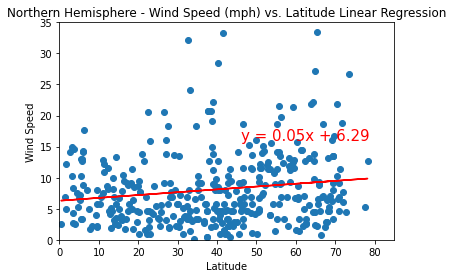

rvalue: 0.15883342287652719
rquared: 0.025228056222673708


<Figure size 432x288 with 0 Axes>

In [33]:
#Northern Hemisphere: wind speed vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(46,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 35)
plt.show()


print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")




In [34]:
#Analysis: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
    #The r-value of 0.19 not close to 1, suggesting a weak positive correlation between wind speed and latitude in the Northern Hemisphere.
    #The rsquared value of implies that only 3% of the data fits the regression model.
    

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

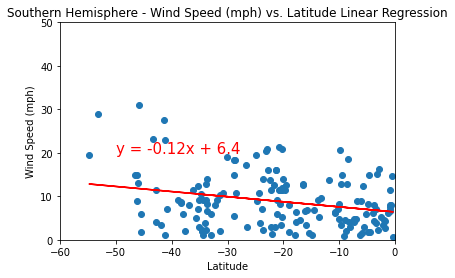

rvalue: -0.2634616849944678
rquared: 0.06941205946012419


<Figure size 432x288 with 0 Axes>

In [35]:
#Southern Hemisphere: wind speed vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 50)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")


In [36]:
#Analysis: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
    #The r-value of -0.16 not close to -1, suggesting a weak negative correlation between wind speed and latitude in the Southern Hemisphere.
    #The rsquared value of implies that only 2% of the data fits the regression model.
    